
<center ><h1>Automated Mental Health Assessment via NLP and Machine Learning</h1></center>


<h3> IMPORTING LIBRARIES  </h3>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import nltk  as nltk

### DATA PREPROCESSING 

In [2]:
df_nlp=pd.read_csv('Mental_Health_Dataset.csv')

In [3]:
df_nlp.head(10)

,Unnamed: 0,statement,status
0,53019,My anxiety is telling me not to be honest/vuln...,Anxiety
1,35494,Worried I have ovarian cancer. The more I'm on...,Anxiety
2,35605,For HA Sufferers with different anxieties than...,Anxiety
3,35707,"Eye floaters from stress? Hello, I recently we...",Anxiety
4,315,"There is excessive anxiety today, .And, there ...",Anxiety
5,52795,how did buspirone/buspar make you feel? did yo...,Anxiety
6,351,Why is it that if there are a lot of people ta...,Anxiety
7,149,I need adit not for stalking or for strange th...,Anxiety
8,35460,Fuck lymph nodes I spent about two months comp...,Anxiety
9,457,confused and restless. This heart seems to die...,Anxiety


In [4]:
df_nlp.dropna(subset=['statement'],inplace=True)

In [5]:
df_nlp['statement']=df_nlp['statement'].astype(str)

### DOWNLOADING THE RESOURCES 

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehakpreetsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehakpreetsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mehakpreetsingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mehakpreetsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import spacy as spacy
nlp=spacy.load('en_core_web_sm')

## NATURAL LANGUAGE PROCESSING MODEL (NLP)

In [8]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


stop_words=set(stopwords.words('english'))
LEM=WordNetLemmatizer()

In [9]:
def NLP_PROCESSING(text):
    
    token_sent=sent_tokenize(text)
    print(f'THE TOKEN OF SENTENCE WORD IS {token_sent}')
    
    token_word=word_tokenize(text)
    print(f'THE TOKEN OF WORDS ARE {token_word}')
    
    token_stop_words =[i for i in token_word if i.lower() not in stop_words and i.isalpha()]
    print(f'THE SENTENCE WITHOUT STOP WORDS ARE {token_stop_words}')
    
    LEM_WORDS=[LEM.lemmatize(word.lower()) for word in token_stop_words]
    print(f'THE SENTENCE WITHOUT LEMMIZATION IS {LEM_WORDS}')
    
    POS_TAGS=nltk.pos_tag(token_word)
    print(f'THE TAGS ARE {POS_TAGS}')
    
    DOC=nlp(text)
    for j in DOC.ents:
        print(j.text,">>>>>",j.label_)
        
    print('=-----------------------NEXT SENTENCE--------------------------------=')
    
        
    return " ".join(LEM_WORDS)

In [ ]:
df_nlp['filter_data']=df_nlp['statement'].apply(NLP_PROCESSING)         

In [11]:
#VECTORIZATION 
from sklearn.feature_extraction.text import TfidfVectorizer
vec_data=TfidfVectorizer()
x=vec_data.fit_transform(df_nlp['filter_data'])

In [12]:
y=df_nlp['status'].astype(str)

In [13]:
#SPLITING THE DATA

def split(x,y):
    from sklearn.model_selection import train_test_split
    x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
    
    x_train,x_test,y_train,y_test= x_train,y_train,x_test,y_test
    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test =split(x,y)

### NAIVE BAYES MODEL 

In [14]:
def model1(X_train,y_train):
    from sklearn.naive_bayes import MultinomialNB
    model_nb=MultinomialNB()
    model_nb.fit(X_train,y_train)
    return model_nb

NB_model=model1(x_train,y_train)

In [15]:
y_pred_nb=NB_model.predict(x_test)

In [16]:
def evaluation_metrics(Y1,Y2):
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
    print('==---------------NAIVE BAYES MODEL EVALUATION-------------------------==')
    
    ACCURACY_SCORE_NAIVE_BAYES=accuracy_score(Y1,Y2)
    print(f'THE ACCURACY SCORE OF NAIVE BAYES IS {ACCURACY_SCORE_NAIVE_BAYES*100}%')
    
    classification_report_NAIVE_BAYES=classification_report(Y1,Y2)
    print(f'THE classification_report OF NAIVE BAYES IS {classification_report_NAIVE_BAYES}')
    
    confusion_matrix_NAIVE_BAYES=confusion_matrix(Y1,Y2)
    print(f'THE  CONFUSION MATRIX OF NAIVE_BAYES  IS {confusion_matrix_NAIVE_BAYES}')
    
    return ACCURACY_SCORE_NAIVE_BAYES,classification_report_NAIVE_BAYES,confusion_matrix_NAIVE_BAYES

accu_scor_NB, CR_NB, CM_NB=evaluation_metrics(y_test,y_pred_nb)

==---------------NAIVE BAYES MODEL EVALUATION-------------------------==
THE ACCURACY SCORE OF NAIVE BAYES IS 51.66240409207161%
THE classification_report OF NAIVE BAYES IS                       precision    recall  f1-score   support

             Anxiety       0.72      0.67      0.70        58
             Bipolar       0.78      0.70      0.74        64
          Depression       0.29      0.27      0.28        64
              Normal       0.80      0.16      0.27        50
Personality disorder       0.57      0.76      0.65        51
              Stress       0.62      0.29      0.39        56
            Suicidal       0.33      0.79      0.47        48

            accuracy                           0.52       391
           macro avg       0.59      0.52      0.50       391
        weighted avg       0.59      0.52      0.50       391

THE  CONFUSION MATRIX OF NAIVE_BAYES  IS [[39  5  4  0  5  2  3]
 [ 0 45  5  0  7  1  6]
 [ 1  3 17  1  3  2 37]
 [ 7  2  7  8  8  5 13]
 [ 0 

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score_NB=cross_val_score(estimator=NB_model,X=x_train,y=y_train,cv=3)
fin_cross=(cross_val_score_NB.mean()*100)
print(f'THE CROSS VALIDATION OF NAIVE BAYES IS {fin_cross}%')

THE CROSS VALIDATION OF NAIVE BAYES IS 54.32292435651361%


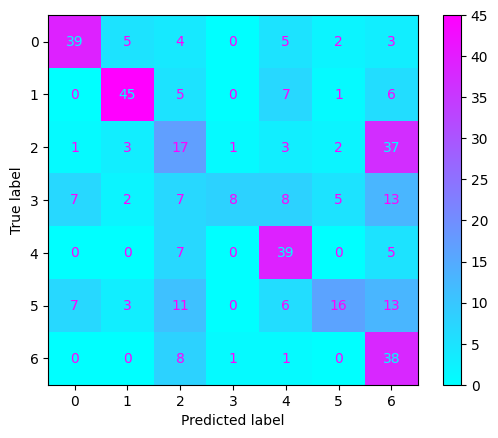

In [18]:
def plot(x):
    from sklearn.metrics import ConfusionMatrixDisplay
    diss=ConfusionMatrixDisplay(confusion_matrix=x)
    diss.plot(cmap='cool')
    
    plt.show()
    
plot(CM_NB)

### RANDOM FOREST MODEL USING GRID SEARCH CV 

In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y1=lb.fit_transform(df_nlp['status'])

In [20]:
def split2(x,y):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2,random_state=20)
    
   
    return  x_train,x_test,y1_train,y1_test

x_train,x_test,y1_train,y1_test =split2(x,y1)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
def model_rf(x,y):
    
    model_2=RandomForestClassifier(random_state=20)

    grid_RF={'n_estimators':[10,20,30],
         'max_depth':[6,9,6],
         'min_samples_split':[7,8,9],
         'min_samples_leaf':[9,10,8]}


    grid_model=GridSearchCV(estimator=model_2,param_grid=grid_RF,cv=2, verbose=2)
    grid_model.fit(x,y)
    return grid_model

grid_model_RF=model_rf(x_train,y1_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_s

In [23]:
print(grid_model_RF.best_estimator_)

RandomForestClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=30, random_state=20)


In [24]:
y2_pred_rf=grid_model_RF.predict(x_test)

In [25]:
def RF_EVA(y_predtion ,y_2):

    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
    
    print('==---------------RANDOM FOREST  MODEL EVALUATION-------------------------==')
    
    ACCURACY_SCORE_NAIVE_BAYES=accuracy_score(y_predtion,y_2)
    print(f'THE ACCURACY SCORE RANDOM FOREST  MODEL  OF IS {ACCURACY_SCORE_NAIVE_BAYES*100}%')
    
    classification_report_NAIVE_BAYES=classification_report(y_predtion,y_2)
    print(f'THE classification_report OF  RANDOM FOREST  MODEL  IS {classification_report_NAIVE_BAYES}')
    
    confusion_matrix_NAIVE_BAYES=confusion_matrix(y_predtion,y_2)
    print(f'THE  CONFUSION MATRIX OF RANDOM FOREST  MODEL   IS {confusion_matrix_NAIVE_BAYES}')
    
    return ACCURACY_SCORE_NAIVE_BAYES,classification_report_NAIVE_BAYES,confusion_matrix_NAIVE_BAYES

accu_scor_RF, CR_RF, CM_RF=RF_EVA(y1_test,y2_pred_rf)

==---------------RANDOM FOREST  MODEL EVALUATION-------------------------==
THE ACCURACY SCORE RANDOM FOREST  MODEL  OF IS 50.127877237851656%
THE classification_report OF  RANDOM FOREST  MODEL  IS               precision    recall  f1-score   support

           0       0.57      0.55      0.56        58
           1       0.80      0.56      0.66        64
           2       0.52      0.22      0.31        64
           3       0.33      1.00      0.50        50
           4       0.67      0.65      0.66        51
           5       0.78      0.12      0.22        56
           6       0.44      0.50      0.47        48

    accuracy                           0.50       391
   macro avg       0.59      0.52      0.48       391
weighted avg       0.60      0.50      0.48       391

THE  CONFUSION MATRIX OF RANDOM FOREST  MODEL   IS [[32  2  0 14  3  2  5]
 [ 4 36  4 15  4  0  1]
 [ 5  4 14 17  5  0 19]
 [ 0  0  0 50  0  0  0]
 [ 4  0  2 10 33  0  2]
 [10  2  4 27  2  7  4]
 [ 1  1  3

In [26]:
from sklearn.model_selection import cross_val_score
cros_RF=cross_val_score(estimator=grid_model_RF,X=x_train,y=y1_train,cv=2)
fina_rf_CV=(cros_RF.mean()*100)
print(f'THE CROSS VALIDATION IS {fina_rf_CV}%')

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=7, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=9, min_s

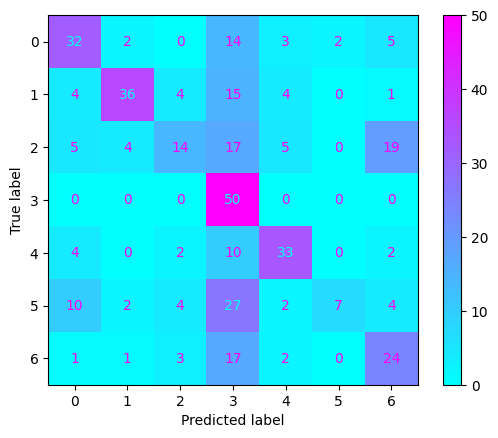

In [27]:
def ploT_rf(x):
    from sklearn.metrics import ConfusionMatrixDisplay
    DIS_RF=ConfusionMatrixDisplay(confusion_matrix=x)
    DIS_RF.plot(cmap='cool')
    plt.show()
    
ploT_rf(CM_RF)
    

### LOGISTIC REGRESSION MODEL 

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
def model_3(x,y):
    modell=LogisticRegression()
    modell.fit(x,y)
    return modell

model_lr=model_3(x_train,y1_train)

In [30]:
Y1_PRED_LR=model_lr.predict(x_test)

In [31]:
def Logistic_Regression_METRICS(M,N):
    from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
    print(F'=------------THE EVALUATION OF LOGISTIC REGRESSION MODEL-----------------=')

    ACCURACY_SCORE_LR=accuracy_score(M,N)
    print(F'THE ACCURACY SCORE OF LOGISTIC REGRESSION IS {ACCURACY_SCORE_LR*100}%')
    
    
    classification_report_LR=classification_report(M,N)
    print(F'THE classification report OF LOGISTIC REGRESSION IS {classification_report_LR}')
    
    
    
    confusion_matrix_LR=confusion_matrix(M,N)
    print(F'THE confusion_matrix  OF LOGISTIC REGRESSION IS {confusion_matrix_LR}')
    
    return ACCURACY_SCORE_LR,classification_report_LR,confusion_matrix_LR
    
    
    
ACCURACY_SCORE_LR,classification_report_LR,confusion_matrix_LR=Logistic_Regression_METRICS(y1_test,Y1_PRED_LR)
    

=------------THE EVALUATION OF LOGISTIC REGRESSION MODEL-----------------=
THE ACCURACY SCORE OF LOGISTIC REGRESSION IS 61.892583120204606%
THE classification report OF LOGISTIC REGRESSION IS               precision    recall  f1-score   support

           0       0.79      0.78      0.78        58
           1       0.89      0.66      0.76        64
           2       0.56      0.34      0.43        64
           3       0.49      0.86      0.63        50
           4       0.71      0.69      0.70        51
           5       0.62      0.50      0.55        56
           6       0.40      0.56      0.47        48

    accuracy                           0.62       391
   macro avg       0.64      0.63      0.62       391
weighted avg       0.65      0.62      0.62       391

THE confusion_matrix  OF LOGISTIC REGRESSION IS [[45  1  1  4  4  2  1]
 [ 0 42  4  7  4  4  3]
 [ 5  2 22  8  2  4 21]
 [ 2  0  0 43  1  1  3]
 [ 2  0  1  6 35  2  5]
 [ 3  2  3 11  2 28  7]
 [ 0  0  8  8  1  4

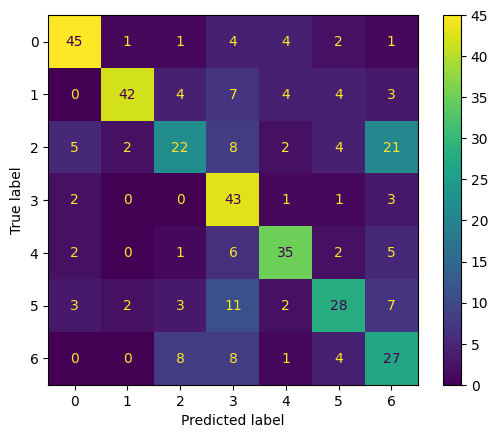

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
dis_lr=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_LR)
dis_lr.plot()

In [33]:
from sklearn.model_selection import cross_val_score
crosS_val_LR=cross_val_score(estimator=model_lr,X=x_train,y=y1_train,cv=2)
final_cr=(crosS_val_LR.mean()*100)
print(f'THE CROSS VALIDATION OF LOGISTIC REGRESSION IS {final_cr}%')

THE CROSS VALIDATION OF LOGISTIC REGRESSION IS 61.11444893135034%


## TESING OF NLP WITH LOGISTIC REGRESSION MODEL LOGISTIC REGRESSION 


In [34]:
print('-------------------THE PREDICTION FOR THIS SENTENCE IS ------------------------------')
def testing(text):
    print(F'THE ENTERED TEXT IS {text}')
    TES_SEN=sent_tokenize(text)
    print(f'THE SENTENCE TOKEN OF ENTER SENTENCE  IS {TES_SEN}')
    
    TES_WORD=word_tokenize(text)
    print(f'THE WORD TOKEN OF ENTER SENTENCE  IS {TES_WORD}')
    
    TES_STOP_WORD=[i for i in TES_WORD if i.lower() not in stop_words and i.isalpha()]
    print(f'THE SENTENCE AFTER STOP WORDS  OF ENTER SENTENCE  IS {TES_STOP_WORD}')
    
    TES_LEM=[LEM.lemmatize(word.lower())for word in TES_STOP_WORD]
    print(f'THE SENTENCE  LEMMATIZATION IS {TES_LEM}')
    
    doc=nlp(text)
    for j in doc.ents:
        j.text,">>>>>",j.label_
        

        
    
    return " ".join(TES_LEM)


tes_1=input('ENTER YOUR THOUGHTS:  ')
input_test=testing(tes_1)

vec_test=vec_data.transform([input_test])
predetict_1=model_lr.predict(vec_test)

inver_predict=lb.inverse_transform(predetict_1)
print(f'THE PREDICTIION  > {inver_predict}')

-------------------THE PREDICTION FOR THIS SENTENCE IS ------------------------------
THE ENTERED TEXT IS i am happy
THE SENTENCE TOKEN OF ENTER SENTENCE  IS ['i am happy']
THE WORD TOKEN OF ENTER SENTENCE  IS ['i', 'am', 'happy']
THE SENTENCE AFTER STOP WORDS  OF ENTER SENTENCE  IS ['happy']
THE SENTENCE  LEMMATIZATION IS ['happy']
THE PREDICTIION  > ['Depression']


### 2ND PREDICTION 

In [51]:
print('-------------------THE PREDICTION FOR THIS SENTENCE IS 2  ------------------------------')
def testing(text):
    TES_SEN=sent_tokenize(text)
    print(f'THE SENTENCE TOKEN OF ENTER SENTENCE  IS {TES_SEN}')
    
    TES_WORD=word_tokenize(text)
    print(f'THE WORD TOKEN OF ENTER SENTENCE  IS {TES_WORD}')
    
    TES_STOP_WORD=[i for i in TES_WORD if i.lower() not in stop_words and i.isalpha()]
    print(f'THE SENTENCE AFTER STOP WORDS  OF ENTER SENTENCE  IS {TES_STOP_WORD}')
    
    TES_LEM=[LEM.lemmatize(word.lower())for word in TES_STOP_WORD]
    print(f'THE SENTENCE  LEMMATIZATION IS {TES_LEM}')
    
    doc=nlp(text)
    for j in doc.ents:
        j.text,">>>>>",j.label_
        

        
    
    return " ".join(TES_LEM)


tes_1=input('ENTER YOUR THOUGHTS:  ')
input_test=testing(tes_1)

vec_test=vec_data.transform([input_test])
predetict_1=model_lr.predict(vec_test)

inver_predict=lb.inverse_transform(predetict_1)
print(f'THE PREDICTIION  > {inver_predict}')

-------------------THE PREDICTION FOR THIS SENTENCE IS 2  ------------------------------
THE SENTENCE TOKEN OF ENTER SENTENCE  IS ["iNo reasons to be unhappy yet I am Had depression ages ago and I think it's creeping back, although it doesn't feel as severe as it was last time.", "Before it was work stress, this time there's really not anything.", "The hardest part for me right now is I don't have any reason to be unhappy, nothing I can really point to and say this is making me feel like crap, and that makes me like a bratty little B crying and complaining  There's nothing really to talk to others about because again, there's nothing that I'd even remotely describe as saddening or upsetting.", "Now I'm stuck being frustrated, pissed, and sad a lot of the time which makes me feel even more bratty and cannot break the cycle.", "Anyone on the same boat or have been on the same boat that don't mind sharing how to get out?"]
THE WORD TOKEN OF ENTER SENTENCE  IS ['iNo', 'reasons', 'to', 'be'

In [48]:
import joblib

joblib.dump(vec_data,'vec.pkl',protocol=4)

['vec.pkl']

In [49]:
import joblib
joblib.dump(model_lr,'mental.pkl',protocol=4)

['mental.pkl']

In [50]:
import joblib
joblib.dump(lb,'label.pkl',protocol=4)

['label.pkl']